In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Dataset
data = pd.read_csv("Watches.csv")
print("Dataset Loaded Successfully\n")
print(data.head())

Dataset Loaded Successfully

       Brand       Model    Case Material   Strap Material Movement Type  \
0      Rolex  Submariner  Stainless Steel  Stainless Steel     Automatic   
1      Omega   Seamaster         Titanium           Rubber     Automatic   
2  Tag Heuer     Carrera  Stainless Steel          Leather     Automatic   
3  Breitling   Navitimer  Stainless Steel  Stainless Steel     Automatic   
4    Cartier   Tank Solo  Stainless Steel          Leather        Quartz   

  Water Resistance  Case Diameter (mm)  Case Thickness (mm)  Band Width (mm)  \
0       300 meters                40.0                13.00             20.0   
1       600 meters                43.5                14.47             21.0   
2       100 meters                41.0                13.00             20.0   
3        30 meters                43.0                14.25             22.0   
4        30 meters                31.0                 6.05             20.0   

  Dial Color Crystal Material Com

In [3]:
# Handle Missing Values
data = data.dropna()

In [4]:
# Encode Categorical Columns
label_encoders = {}

for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [5]:
# Define Features and Target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Create Gradient Boosting Model
model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [8]:
# Train the Model
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=150, random_state=42)

In [9]:
# Make Predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluate the Model
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.03896103896103896

Confusion Matrix:

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]

Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00    

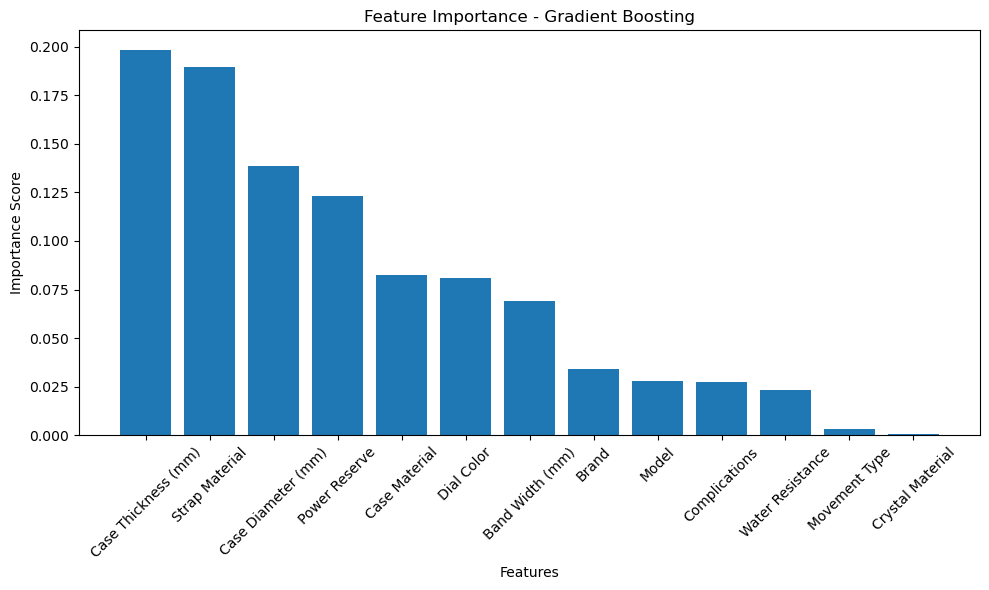

In [11]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Gradient Boosting")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

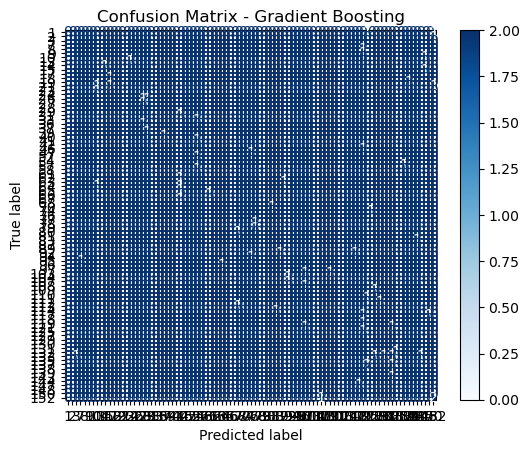

In [12]:
#Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    cmap="Blues"
)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

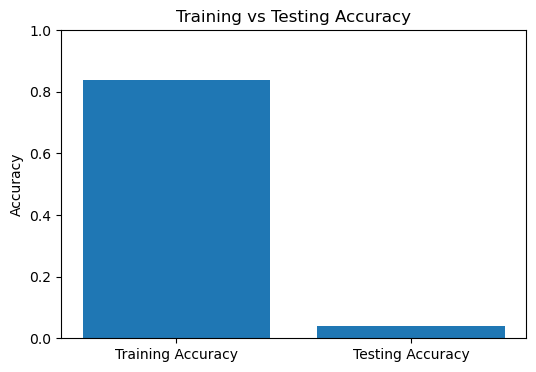

In [13]:
#Training vs Testing Accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

plt.figure(figsize=(6, 4))
plt.bar(
    ["Training Accuracy", "Testing Accuracy"],
    [train_accuracy, test_accuracy]
)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.ylim(0, 1)
plt.show()